Packete laden

In [2]:
import sympy as sp
import numpy as np
from sympy.plotting import plot
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

Definition der beiden Variablen

In [12]:
t, s, t_1, I_d, C, u_0 = sp.symbols('t, s, t_1, I_d, C, u_0')
g = I_d/t_1*(t*sp.Heaviside(t)- 2*(t-t_1)*sp.Heaviside(t-t_1)+ (t-2*t_1)*sp.Heaviside(t-2*t_1))
g
G=sp.laplace_transform(g, t, s, noconds=True)
y=sp.inverse_laplace_transform(G/(C*s)+u_0/s, s, t)
y

I_d*(t*Heaviside(t) + (t - 2*t_1)*Heaviside(t - 2*t_1) - (2*t - 2*t_1)*Heaviside(t - t_1))/t_1

(C*t_1*u_0*Heaviside(t) + I_d*(t**2*Heaviside(t) + (t - 2*t_1)**2*Heaviside(t - 2*t_1) - 2*(t - t_1)**2*Heaviside(t - t_1))/2)/(C*t_1)

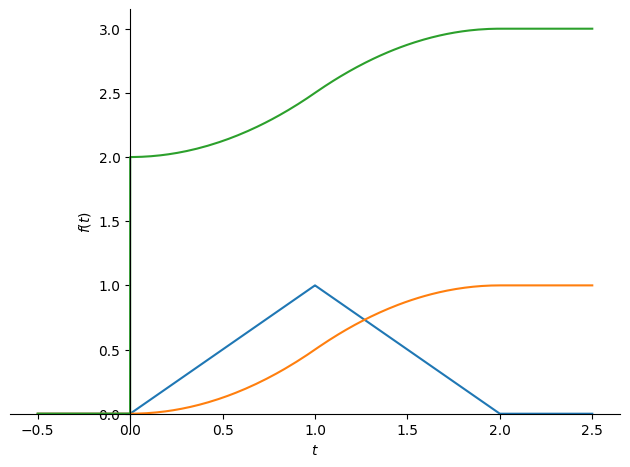

In [43]:
plot(g.subs({I_d:1,C:1,t_1:1,u_0:0}),y.subs({I_d:1,C:1,t_1:1,u_0:0}),y.subs({I_d:1,C:1,t_1:1,u_0:2}),(t,-0.5,2.5))

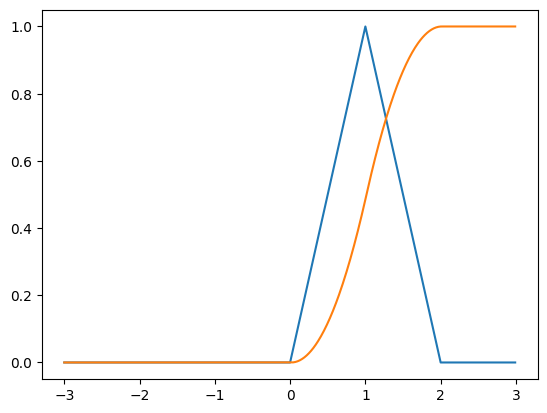

In [57]:
g_f = sp.lambdify((t), g.subs({I_d:1,C:1,t_1:1,u_0:0}), "numpy")
step = 0.01
t_n = np.arange(-3,3,step)
g_n = g_f(t_n)

u=sp.inverse_laplace_transform(C/s+u_0, s, t)
u_f = sp.lambdify((t), u.subs({C:1,u_0:0}), "numpy")
u_n=u_f(t_n)

y_2=np.convolve(u_n,g_n,"same")*step

plt.plot(t_n,g_n,t_n,y_2)